In [ ]:
import pandas as pd

In [ ]:
# TypeId=3 in URL returns only government bills, TypeId=4 returns only private members bills
dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=42-1&billDocumentTypeId=3',header=0)
vote_list = dfs_vote_list[1]
vote_list.head()

,Vote Number,Vote Respecting,Subject,Votes (Yeas / Nays / Paired),Vote Result,Date
0,No. 1379,House Government Bill,Motion respecting Senate amendments to Bill C-...,161 / 58 / 2,Agreed To,"June 19, 2019"
1,No. 1378,House Government Bill,Motion for closure,149 / 67 / 2,Agreed To,"June 19, 2019"
2,No. 1374,House Government Bill,Motion respecting Senate amendments to Bill C-...,190 / 86 / 2,Agreed To,"June 18, 2019"
3,No. 1373,House Government Bill,Motion for closure,157 / 113 / 2,Agreed To,"June 18, 2019"
4,No. 1372,House Government Bill,"3rd reading and adoption of Bill C-102, An Act...",167 / 123 / 2,Agreed To,"June 18, 2019"


In [ ]:
# [initialize global variables:]
total_votes = 0
partyLineVotesConservative = 0 
non_partyLineVotesConservative = 0
partyLineVotesLiberal = 0 
non_partyLineVotesLiberal = 0
partyLineVotesNDP = 0 
non_partyLineVotesNDP = 0
partyLineVotesBloc = 0 
non_partyLineVotesBloc = 0

In [ ]:
# Functions for categorizing and tabulating votes by party:
def liberal_votes():
    global partyLineVotesLiberal 
    global non_partyLineVotesLiberal
    
    df_party = df[df['Party'].str.contains('Liberal')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesLiberal += 1
    else:
        partyLineVotesLiberal += 1
    
def conservative_votes():
    global partyLineVotesConservative 
    global non_partyLineVotesConservative
    
    df_party = df[df['Party'].str.contains('Conservative')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesConservative += 1
    else:
        partyLineVotesConservative += 1
        
def ndp_votes():
    global partyLineVotesNDP 
    global non_partyLineVotesNDP

    df_party = df[df['Party'].str.contains('NDP')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesNDP += 1
    else:
        partyLineVotesNDP += 1
    
def bloc_votes():
    global partyLineVotesBloc 
    global non_partyLineVotesBloc

    df_party = df[df['Party'].str.contains('Bloc')]
    vote_output_yea = df_party['Vote'].str.contains('Yea')
    total_votes_yea = vote_output_yea.sum()
    vote_output_nay = df_party['Vote'].str.contains('Nay')
    total_votes_nay = vote_output_nay.sum()
    if total_votes_yea>0 and total_votes_nay>0:
        non_partyLineVotesBloc += 1
    else:
        partyLineVotesBloc += 1

In [ ]:
# Build URL list from master Votes page:
dfs_vote_list = pd.read_html('https://www.ourcommons.ca/Members/en/votes?parlSession=42-1&billDocumentTypeId=3',header=0)
vote_list = dfs_vote_list[1]
vote_list.columns = ['Number','Type','Subject','Votes','Result','Date']
vote_list['Number'] = vote_list['Number'].str.extract('(\d+)', expand=False)
base_url = "https://www.ourcommons.ca/Members/en/votes/42/1/"
url_data = pd.DataFrame(columns=["Vote"])
Vote = []
for name in vote_list['Number']:
    newUrl = base_url + name
    Vote.append(newUrl)
url_data["Vote"] = Vote
url_data.head()

,Vote
0,https://www.ourcommons.ca/Members/en/votes/42/...
1,https://www.ourcommons.ca/Members/en/votes/42/...
2,https://www.ourcommons.ca/Members/en/votes/42/...
3,https://www.ourcommons.ca/Members/en/votes/42/...
4,https://www.ourcommons.ca/Members/en/votes/42/...


In [ ]:
# Run this only once!
url_data.to_csv(r'url-text-42-1-government', 
                header=None, index=None, sep=' ', mode='a')

In [ ]:
# Read URLs
URLS = open("url-text-42-1-government","r")
for url in URLS:
    # Read next HTML page in set:
    dfs = pd.read_html(url,header=0)
    df = dfs[0]
    df.rename(columns={'Member Voted':'Vote'}, inplace=True)
    df.rename(columns={'Political Affiliation':'Party'}, inplace=True)
    # Ignore unanimous votes:
    vote_output_nay = df[df['Vote'].str.contains('Nay', na=False)]
    total_votes_nay = vote_output_nay['Vote'].str.contains('Nay', na=False)
    filtered_votes = total_votes_nay.sum()
    if filtered_votes==0:
        continue
    # Call functions to tabulate votes:
    else:
        liberal_votes()
        conservative_votes()
        ndp_votes()
        bloc_votes()

        total_votes += 1


print("We counted", total_votes, "votes in total.")

print("Conservative members voted the party line", partyLineVotesConservative, 
      "times, and split their vote", non_partyLineVotesConservative, "times.")

print("Liberal members voted the party line", partyLineVotesLiberal, 
      "times, and split their vote", non_partyLineVotesLiberal, "times.")

print("NDP members voted the party line", partyLineVotesNDP, 
      "times, and split their vote", non_partyLineVotesNDP, "times.")
    
print("Bloc members voted the party line", partyLineVotesBloc, 
      "times, and split their vote", non_partyLineVotesBloc, "times.")

We counted 423 votes in total.
Conservative members voted the party line 407 times, and split their vote 16 times.
Liberal members voted the party line 401 times, and split their vote 22 times.
NDP members voted the party line 416 times, and split their vote 7 times.
Bloc members voted the party line 422 times, and split their vote 1 times.


In [ ]:
data = {'Party': ['Conservative', 'Liberal', 'NDP', 'Bloc'],
'Party-line votes': [408, 402, 417, 423],
'Non-party-line votes': [16, 22, 7, 1]}
dfdata = pd.DataFrame (data, columns = ['Party', 'Party-line votes', 'Non-party-line votes'])

# print(df_output_42_1_government)
print(dfdata)

          Party  Party-line votes  Non-party-line votes
0  Conservative               408                    16
1       Liberal               402                    22
2           NDP               417                     7
3          Bloc               423                     1


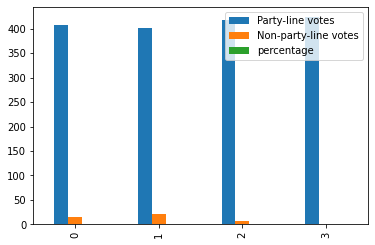

In [ ]:
dfdata['percentage']= dfdata['Non-party-line votes']/dfdata['Party-line votes'].sum()
dfdata
#dfdata = df_output_42_1_government['Party-line votes',+,'non-party-line votes',/,'Party-line votes']

dfdata.plot(kind='bar')